<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li></ul></div>

# Выбор локации для скважины

Нефтедобывающая компания **"ГлавРосГосНефть"** хочет определить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль; проанализировать возможную прибыль и риски техникой *Bootstrap*.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Описание данных

**id** — уникальный идентификатор скважины;

**f0**, **f1**, **f2** — три признака точек (данные геологоразведки);

**product** — объем запаса нефти в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

try:
    geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_0 = pd.read_csv('home/an4ouce/datasets/geo_data_0.csv')
    geo_1 = pd.read_csv('home/an4ouce/datasets/geo_data_1.csv')
    geo_2 = pd.read_csv('home/an4ouce/datasets/geo_data_2.csv')

In [2]:
geo_list = [geo_0, geo_1, geo_2]
geo_list_name = ['geo_0', 'geo_1', 'geo_2']
for geo in geo_list:
    display(geo.head())
    display(geo.info())
    display(geo.describe())
    

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Нам предоставлены данные геологоразведки трех регионов. Данные по регионам находятся в отдельных таблицах, состоящих из 100 000 строк. На первый взгляд, все нормально, пропусков нет. Проверим датафреймы на полные дубликаты:

In [3]:
for geo, geo_name in zip(geo_list, geo_list_name):
    print('Количество полных дубликатов в таблице ' + geo_name + ':', geo.duplicated().sum())

Количество полных дубликатов в таблице geo_0: 0
Количество полных дубликатов в таблице geo_1: 0
Количество полных дубликатов в таблице geo_2: 0


Полностью задублированные строки отсутствуют. Теперь нужно проверить, ну задублированы ли ID скважин:

In [4]:
for geo, geo_name in zip(geo_list, geo_list_name):
    print('Количество задублированных ID в таблице ' + geo_name + ':',
                                         geo['id'].duplicated().sum())

Количество задублированных ID в таблице geo_0: 10
Количество задублированных ID в таблице geo_1: 4
Количество задублированных ID в таблице geo_2: 4


Немного, но есть. Удалим строки, где дублируются ID скважин:

In [5]:
for geo, geo_name in zip(geo_list, geo_list_name):
    geo.drop_duplicates('id', inplace=True)
    print('Количество строк после удаления дубликатов в таблице ' + geo_name + ':',
                                                                      geo.shape[0])

Количество строк после удаления дубликатов в таблице geo_0: 99990
Количество строк после удаления дубликатов в таблице geo_1: 99996
Количество строк после удаления дубликатов в таблице geo_2: 99996


Теперь удалим из всех датафреймов столбец ID. Он уникален для каждой скважины и не нужен для обучения модели.

In [6]:
for geo, geo_name in zip(geo_list, geo_list_name):
    geo.drop(['id'], axis=1, inplace=True)
    print('Количество строк/столбцов в таблице ' + geo_name + ' после удаления столбца ID:',
                                                                                  geo.shape)

Количество строк/столбцов в таблице geo_0 после удаления столбца ID: (99990, 4)
Количество строк/столбцов в таблице geo_1 после удаления столбца ID: (99996, 4)
Количество строк/столбцов в таблице geo_2 после удаления столбца ID: (99996, 4)


Проверим корреляцию признаков в таблицах:

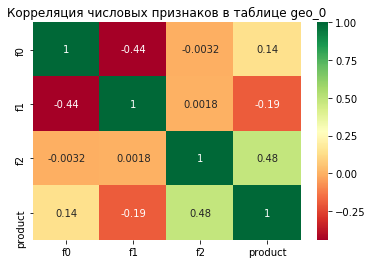

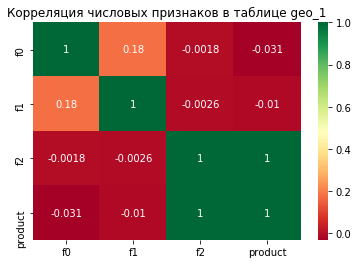

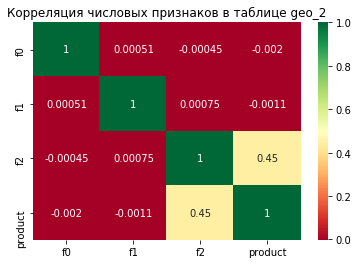

In [7]:
for geo, geo_name in zip(geo_list, geo_list_name):
    sns.heatmap(geo.corr(), cmap='RdYlGn', annot=True)
    plt.title('Корреляция числовых признаков в таблице ' + geo_name)
    plt.show()

Как видим, из всех признаков наиболее сильно выражено влияние **f2** на целевой признак (**product**). Причем в регионе **geo_1** корреляция между ними вообще равна единице. Построим диаграммы рассеяния и посмотрим на зависимость целевого признака от **f2**:

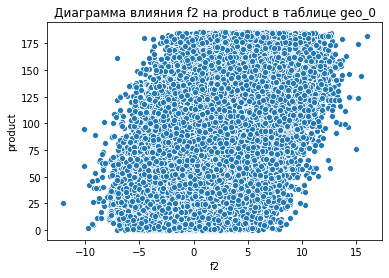

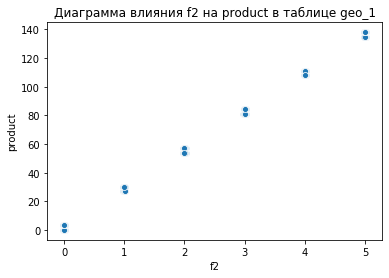

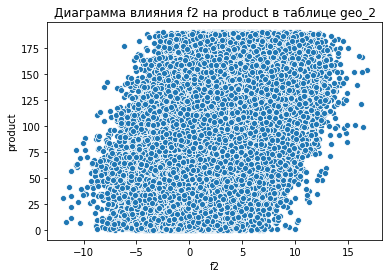

In [8]:
for geo, geo_name in zip(geo_list, geo_list_name):
    sns.scatterplot(data=geo, x='f2', y='product')
    plt.title('Диаграмма влияния f2 на product в таблице ' + geo_name)
    plt.show()

Видим в **geo_1** много повторяющихся значений, образующих линейную зависимость. Взглянем на них:

In [9]:
geo_1['product'].value_counts().to_frame()

,product
53.906522,8472
26.953261,8468
84.038886,8430
57.085625,8389
3.179103,8337
80.859783,8320
30.132364,8306
110.992147,8303
134.766305,8303
0.000000,8235


Да, признак **f2** в таблице **geo_1** содержит всего 12 уникальных значений, каждое из которых повторяется от 8200 до 8472 раз. Причем 8235 значений признака **f2** - нулевые. Посмотрим на гистограмму распрееления целевого признака в каждом регионе:

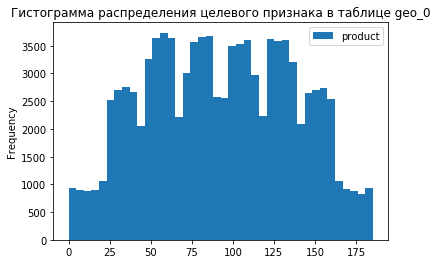

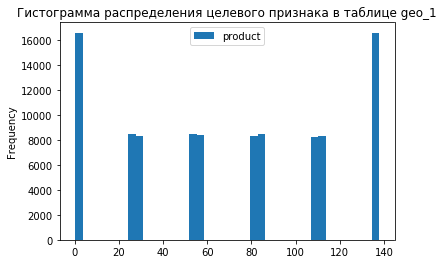

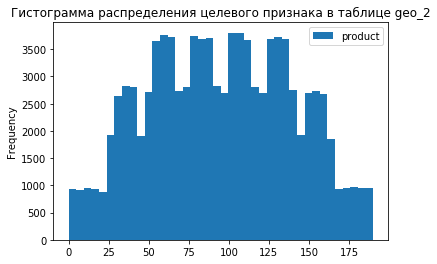

In [10]:
for geo, geo_name in zip(geo_list, geo_list_name):
    geo.plot(y='product', kind='hist', bins=40)
    plt.title('Гистограмма распределения целевого признака в таблице ' + geo_name)
    plt.show()

В регионах **geo_0** и **geo_2** распределение близко к нормальному, в регионе **geo_1** распределение не подчиняется нормальному закону ввиду малого количества уникальных значений и множества повторений.

Теперь обучим модель линейной регрессии для предсказания количества продукта в скважинах.

## Обучение и проверка модели

Укажем признаки (features) и целевой признак (target) для модели:

In [11]:
target_0 = geo_0['product']
features_0 = geo_0.drop('product', axis = 1)

target_1 = geo_1['product']
features_1 = geo_1.drop('product', axis = 1)

target_2 = geo_2['product']
features_2 = geo_2.drop('product', axis = 1)

Напишем функцию, которая делит датафрейм на обучающую (75% данных) и валидационную (25% данных) выборки.

In [12]:
def split(target, features): 
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                        target,
                                                                        test_size=0.25,
                                                                        random_state = 12345)
    
    return features_train, features_valid, target_train, target_valid

Разделим все три датафрейма на обучающую и валидационную выборку:

In [13]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split(target_0, 
                                                                           features_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = split(target_1,
                                                                           features_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split(target_2,
                                                                           features_2)

data_target = {'geo_0':[target_train_0.shape[0], target_valid_0.shape[0]],
        'geo_1':[target_train_1.shape[0], target_valid_1.shape[0]],
        'geo_2':[target_train_2.shape[0], target_valid_2.shape[0]]}

table_target = pd.DataFrame(data_target)

table_target.index = ['Обучающая выборка', 'Валидационная выборка']

display(table_target)

,geo_0,geo_1,geo_2
Обучающая выборка,74992,74997,74997
Валидационная выборка,24998,24999,24999


Видим, что разделили в правильном процентном соотношении.

Теперь напишем функцию, обучающую модель линейной регресии на обучающей выборке, делающую предсказания на валидационной выборке, а также считающую средний объем запасов в скважине и RMSE (корень из среднеквадратичной ошибки) модели.

In [14]:
def fit_predict(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions_mean = predictions.mean()
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    return predictions, predictions_mean, rmse

In [15]:
predictions_0, predictions_mean_0, rmse_0 = fit_predict(features_train_0, features_valid_0,
                                                                            target_train_0,
                                                                            target_valid_0)

In [16]:
predictions_1, predictions_mean_1, rmse_1 = fit_predict(features_train_1, features_valid_1,
                                                                            target_train_1,
                                                                            target_valid_1)

In [17]:
predictions_2, predictions_mean_2, rmse_2 = fit_predict(features_train_2, features_valid_2,
                                                                            target_train_2,
                                                                            target_valid_2)

In [18]:
data_predict = {'geo_0':[predictions_mean_0, rmse_0],
        'geo_1':[predictions_mean_1, rmse_1],
        'geo_2':[predictions_mean_2, rmse_2]}

pd.set_option('display.float_format', '{:.2f}'.format)
table_predict = pd.DataFrame(data_predict)

table_predict.index = ['Средний предсказанный запас сырья', 'RMSE модели']

display(table_predict)

,geo_0,geo_1,geo_2
Средний предсказанный запас сырья,92.79,69.18,94.87
RMSE модели,37.85,0.89,40.08


**Вывод:** средний предсказанный запас сырья в скважине региона **geo_1** сильно меньше других регионов (69,18 тыс.баррелей). RMSE модели региона **geo_1** самое хорошее (0,89 тыс. баррелей), то есть ошибается модель ненамного, в отличие от других регионов, где RMSE составляет 37-40 тыс. баррелей. Пока регион **geo_1** выглядит самым непривлекательным, так как средние запасы у него меньше других, но с другой стороны, риск ошибиться невелик.

## Подготовка к расчёту прибыли

Подготовим функцию для расчета прибыли с региона. Сохраним все константные переменные.

In [19]:
#500 скважин при исследовании
wells_total = 500

#200 лучших скважин для разработки
wells_best = 200

#бюджет на разработку в регионе - 10 млрд руб. (будем считать в тыс.руб., поэтому избавились
#от трех нулей)
budget_region = 10000000

#бюджет на одну скважину
budget_well = budget_region/wells_best
print('Бюджет на разработку одной скважины: ', budget_well, ' тыс. руб')

#доход с каждой единицы продукта - 450 тыс. руб. (1 тыс. баррелей) 
product_income = 450

#минимальная добыча с одной скважины
barrel_well = budget_well / product_income
print('Минимальная добыча с одной скважины: {:.2f}'.format(barrel_well), ' тыс. баррелей')

#минимальная добыча с региона
income_region = wells_best * barrel_well
print('Минимальная добыча с одного региона: {:.2f}'.format(income_region), 'тыс. баррелей')

Бюджет на разработку одной скважины:  50000.0  тыс. руб
Минимальная добыча с одной скважины: 111.11  тыс. баррелей
Минимальная добыча с одного региона: 22222.22 тыс. баррелей


Напишем функцию для расчета прибыли:

In [20]:
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    income_top = product_income * selected.sum()
    
    return income_top - budget_region

**Вывод:** для того, чтобы окупить вложения в разработку скважин, минимальная добыча с одной скважины составляет 111.11 тыс баррелей. Это больше средних запасов в каждом регионе (92.79 тыс. баррелей в **geo_0**; 69.18 тыс. баррелей в **geo_1** и 94.87 тыс. баррелей в **geo_2**). Но в регионах есть как хорошие, так и плохие скважины, и нам нужно выбрать ТОП-200 скважин, приносящих наибольшую прибыль.

## Расчёт прибыли и рисков 

Напишем функцию, генерирующую 1000 выборок по 500 случайных скважин в каждой, найдем предсказания модели, соответствующие этим скважинам, и посчитаем суммарную прибыль с 200 лучших скважин.

In [21]:
def bootstrap(target, predictions):

    state = np.random.RandomState(12345)
    bootstrap_samples = 1000 # количество повторений цикла
    
    values = []
    target = target.reset_index(drop=True)
    count = 0 # счетчик убыточных скважин
    
    for i in range(bootstrap_samples):
        target_subsample = target.sample(n=500, replace=True, random_state=state) 
        probs_subsample = pd.Series(predictions)[target_subsample.index]
        income = profit(target_subsample, probs_subsample, 200)
     
        
        if income < 0:
            count += 1
        values.append(income)
                
    values = pd.Series(values)
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975) 
    income_mean = values.mean()
    risk = (count / bootstrap_samples) * 100 # % убыточных скважин
    return lower, upper, income_mean, risk

In [22]:
lower_0, upper_0, income_mean_0, risk_0 = bootstrap(target_valid_0, predictions_0)
lower_1, upper_1, income_mean_1, risk_1 = bootstrap(target_valid_1, predictions_1)
lower_2, upper_2, income_mean_2, risk_2 = bootstrap(target_valid_2, predictions_2)

In [23]:
data_boot = {'geo_0':[income_mean_0, lower_0, upper_0, risk_0],
        'geo_1':[income_mean_1, lower_1, upper_1, risk_1],
        'geo_2':[income_mean_2, lower_2, upper_2, risk_2]}

pd.set_option('display.float_format', '{:.2f}'.format)
table_boot = pd.DataFrame(data_boot)

table_boot.index = ['Средняя прибыль, тыс.руб.', 'Доверительный интервал (начало)',
                    'Доверительный интервал (конец)', 'Риск убытков, %']

display(table_boot)

,geo_0,geo_1,geo_2
"Средняя прибыль, тыс.руб.",409428.04,536902.59,353790.36
Доверительный интервал (начало),-131536.03,114527.90,-159194.03
Доверительный интервал (конец),944395.58,970787.91,875652.50
"Риск убытков, %",7.10,0.90,10.20


**Вывод:** как видим, наибольшая средняя прибыль наблюдается в регионе **geo_1** (536.9 млн руб). С вероятностью 95% прибыль окажется в промежутке от 114.5 до 970.8 млн руб. Риски убытков в этом регионе самые маленькие (всего 0.9%). В регионах **geo_0** и **geo_2** прибыль меньше (409.4 и 353.8 млн руб соответственно) и риски убытка намного выше (7.1 и 10.2%).

Самым выгодным для разработки является регион **geo_1**.
